In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [40]:
df1 = pd.read_csv('word_cloud_df1.csv')

/Users/ares/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


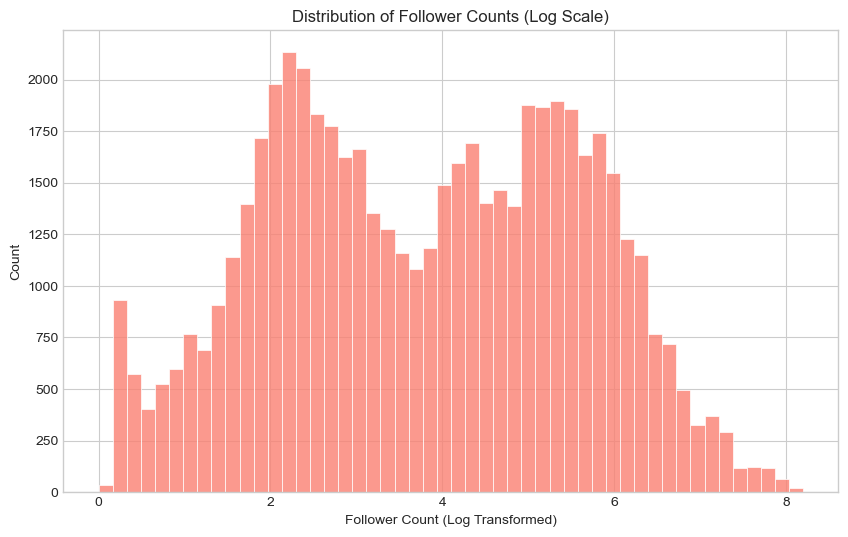

In [41]:
follower_counts_log = np.log10(df1['发布者粉丝数'] + 1)
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(follower_counts_log, bins=50, color='salmon', alpha=0.8, edgecolor='white', linewidth=0.5)
plt.xlabel('Follower Count (Log Transformed)')
plt.ylabel('Count')
plt.title('Distribution of Follower Counts (Log Scale)')
plt.show()

/var/folders/cl/48s26tln7s52dn33yg1yx2f40000gn/T/ipykernel_97481/1872814881.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emotion_counts = df1.groupby(['bins', 'predictions']).size().unstack().fillna(0)


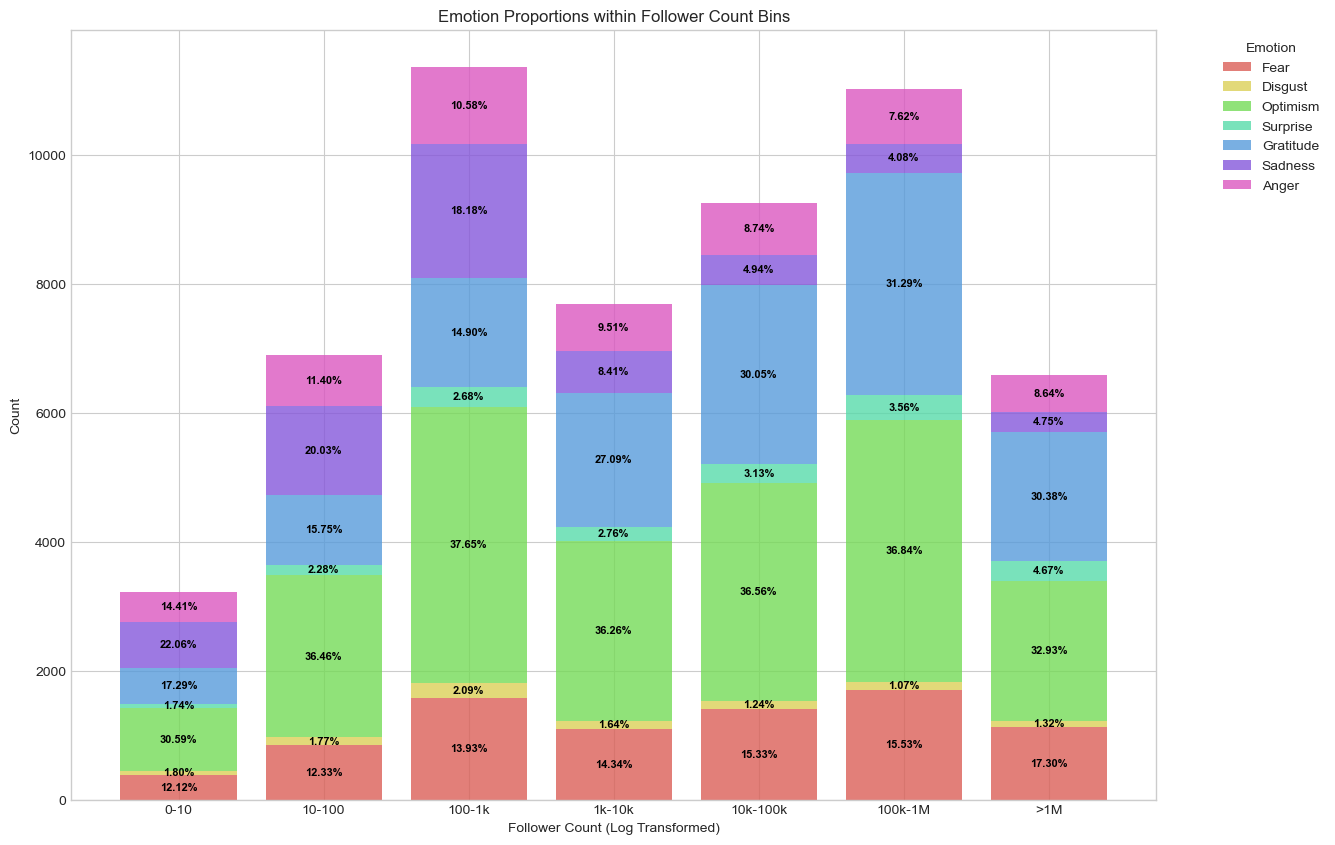

In [42]:
df1['log_follower_count'] = np.log10(df1['发布者粉丝数'] + 1)

bins = [0, 1, 2, 3, 4, 5, 6, np.inf]
labels = ['0-10', '10-100', '100-1k', '1k-10k', '10k-100k', '100k-1M', '>1M']

df1['bins'] = pd.cut(df1['log_follower_count'], bins=bins, labels=labels, include_lowest=True)

emotion_counts = df1.groupby(['bins', 'predictions']).size().unstack().fillna(0)
emotion_proportions = emotion_counts.div(emotion_counts.sum(axis=1), axis=0)

colors = sns.color_palette('hls', n_colors=7)
emotions = ['Fear', 'Disgust', 'Optimism', 'Surprise', 'Gratitude', 'Sadness', 'Anger']

plt.figure(figsize=(14, 10))
bottom = np.zeros(len(emotion_counts))


for emotion, color in zip(emotion_proportions.columns, colors):
    heights = emotion_counts[emotion]
    plt.bar(emotion_proportions.index, heights, bottom=bottom, color=color, label=emotions[int(emotion)], alpha=0.8)
    bottom += heights

for i in range(len(emotion_proportions)):
    bin_bottom = 0
    for emotion, color in zip(emotion_proportions.columns, colors):
        count = emotion_counts.iloc[i][emotion]
        proportion = emotion_proportions.iloc[i][emotion]
        plt.text(i, bin_bottom + count / 2, f'{proportion:.2%}', ha='center', va='center', color='black', fontsize=8, fontweight='bold')
        bin_bottom += count

plt.xlabel('Follower Count (Log Transformed)')
plt.ylabel('Count')
plt.title('Emotion Proportions within Follower Count Bins')
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()